In [1]:
# required imports
from computer_vision import ComputerVisionService
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

Setup your api key and region where the api is deployed

In [2]:
api_key = ''
region = 'westeurope'

Create the **ComputerVisionService** object passing in the region and api_key

In [3]:
cv = ComputerVisionService(region, api_key)

Now, we're going to setup some images to use throughout this notebook and a few helpful methods to display images in the notebook

In [4]:
person = "http://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/woman_roof.jpg"
group = 'https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/family_photo.jpg'
house = "https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/images/house_yard.jpg"
dog = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/cute_dog.jpg"
rushmore = 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/MtRushmore.jpg/1920px-MtRushmore.jpg'
bgates = 'https://upload.wikimedia.org/wikipedia/commons/d/d9/Bill_gates_portrait.jpg'
city = 'https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/bw_buildings.jpg'
lion ='https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/lion_drawing.jpg'
quote = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png'
handwrite = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg'

def displayImage(image_url, caption=None, alpha=1.0):
    image = Image.open(BytesIO(requests.get(image_url).content))
    fig = plt.figure(figsize=(10,6))
    ax = plt.imshow(image, alpha=alpha)
    plt.axis("off")
    if caption != None:
        _ = plt.title(caption, fontsize=16)
    return ax

## analyzeUrl

Usage: **cv.analyze(image_url, visualFeatures, [details])**  
Example: **cv.analyze(image_url, 'Categories, Tags, Faces')**

VisualFeatures are a comma separated list of analysis features that should be returned by the api call

- Categories - categorizes image content according to a taxonomy defined in documentation.
- Tags - tags the image with a detailed list of words related to the image content.
- Description - describes the image content with a complete English sentence.
- Faces - detects if faces are present. If present, generate coordinates, gender and age.
- ImageType - detects if image is clipart or a line drawing.
- Color - determines the accent color, dominant color, and whether an image is black&white.
- Adult - detects if the image is pornographic in nature (depicts nudity or a sex act). Sexually suggestive content is also detected.

Details can either be 'Celebrities' or 'Landmarks' and indicates which domain-specific details to return. Default is None.


{
   "categories": [
      {
         "name": "people_",
         "score": 0.81640625,
         "detail": {
            "celebrities": []
         }
      }
   ],
   "description": {
      "tags": [
         "person",
         "outdoor",
         "woman",
         "standing",
         "holding",
         "building",
         "posing",
         "front",
         "smiling",
         "young",
         "man",
         "hair",
         "yellow",
         "dress",
         "shirt",
         "wearing",
         "white",
         "street",
         "board"
      ],
      "captions": [
         {
            "text": "a woman standing in front of a building",
            "confidence": 0.8511966945697566
         }
      ]
   },
   "requestId": "97933afa-58c7-48ca-a7b3-ebba398722a8",
   "metadata": {
      "height": 200,
      "width": 300,
      "format": "Jpeg"
   }
}


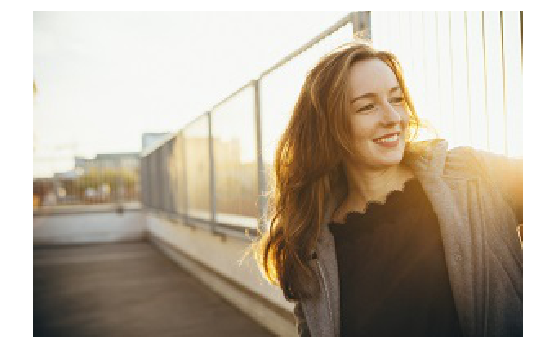

In [5]:
result = cv.analyzeUrl(person, 'Categories, Description')
print(json.dumps(result, indent=3))
_ = displayImage(person)

## analyzeImage

This method allows to pass an image stored in memory for analysis. It uses the same parameters than the analyzeUrl method, except it expects a bytes object rather than an URL 

{
   "categories": [
      {
         "name": "outdoor_",
         "score": 0.00390625,
         "detail": {
            "landmarks": []
         }
      },
      {
         "name": "trans_bicycle",
         "score": 0.95703125
      }
   ],
   "description": {
      "tags": [
         "outdoor",
         "water",
         "motorcycle",
         "person",
         "man",
         "beach",
         "front",
         "sitting",
         "ocean",
         "wearing",
         "riding",
         "sunglasses",
         "black",
         "standing",
         "red",
         "body",
         "blue",
         "woman"
      ],
      "captions": [
         {
            "text": "a man sitting on a motorcycle in front of a body of water",
            "confidence": 0.9564105578806983
         }
      ]
   },
   "requestId": "b525cd45-96ae-4854-bc9c-c13a4bc9501f",
   "metadata": {
      "height": 600,
      "width": 899,
      "format": "Jpeg"
   }
}


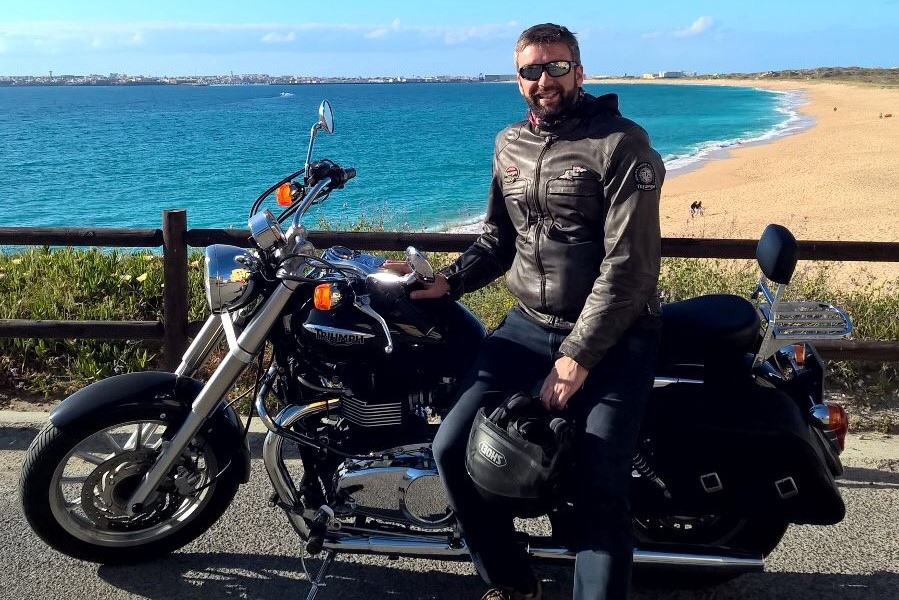

In [6]:
# this is me by the way :)
image_data = open('images/photo.jpg', "rb").read()

result = cv.analyzeImage(image_data, 'Categories, Description')
print(json.dumps(result, indent=3))

from IPython.core.display import Image as lImage
lImage('images/photo.jpg', width=400)

### Example: Tagging

{
  "tags": [
    {
      "name": "grass",
      "confidence": 0.9999995231628418
    },
    {
      "name": "outdoor",
      "confidence": 0.9999210834503174
    },
    {
      "name": "house",
      "confidence": 0.9968538880348206
    },
    {
      "name": "sky",
      "confidence": 0.9953215718269348
    },
    {
      "name": "building",
      "confidence": 0.9943683743476868
    },
    {
      "name": "tree",
      "confidence": 0.9888035655021667
    },
    {
      "name": "lawn",
      "confidence": 0.788884699344635
    },
    {
      "name": "green",
      "confidence": 0.7125059366226196
    },
    {
      "name": "residential",
      "confidence": 0.7085908651351929
    },
    {
      "name": "grassy",
      "confidence": 0.4662468135356903
    }
  ],
  "requestId": "a24fc0f8-8a54-44e6-a3bd-46c4680cc3b4",
  "metadata": {
    "height": 200,
    "width": 300,
    "format": "Jpeg"
  }
}


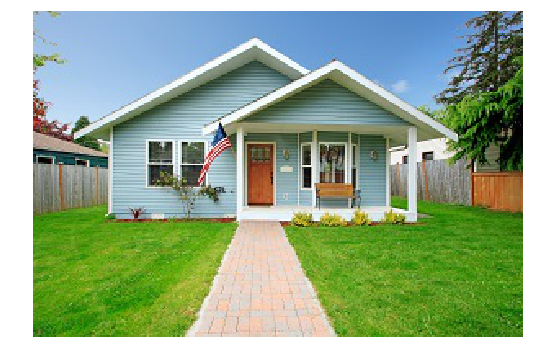

In [7]:
result = cv.analyzeUrl(house, 'Tags')
print(json.dumps(result, indent=2))
_ = displayImage(house)

### Example: Categorizing

Categorizes pictures according to a [predefined taxonomy](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/category-taxonomy)

{
  "categories": [
    {
      "name": "animal_dog",
      "score": 0.99609375
    }
  ],
  "requestId": "c89add71-32a4-4c52-a50d-ed6cb6f9a605",
  "metadata": {
    "height": 267,
    "width": 300,
    "format": "Jpeg"
  }
}


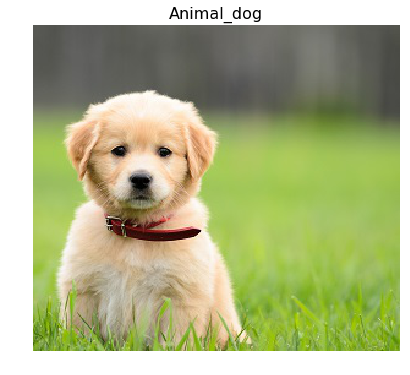

In [8]:
result = cv.analyzeUrl(dog, 'Categories')
print(json.dumps(result, indent=2))
image_caption = result["categories"][0]["name"].capitalize()

_ = displayImage(dog, image_caption)

### Example: Face detection

{
  "faces": [
    {
      "age": 11,
      "gender": "Male",
      "faceRectangle": {
        "top": 63,
        "left": 23,
        "width": 44,
        "height": 44
      }
    },
    {
      "age": 11,
      "gender": "Female",
      "faceRectangle": {
        "top": 126,
        "left": 240,
        "width": 43,
        "height": 43
      }
    },
    {
      "age": 40,
      "gender": "Male",
      "faceRectangle": {
        "top": 44,
        "left": 102,
        "width": 41,
        "height": 41
      }
    },
    {
      "age": 31,
      "gender": "Female",
      "faceRectangle": {
        "top": 55,
        "left": 201,
        "width": 40,
        "height": 40
      }
    }
  ],
  "requestId": "b43e14c2-ce9c-47df-9a10-f0a517f36cba",
  "metadata": {
    "height": 231,
    "width": 300,
    "format": "Jpeg"
  }
}


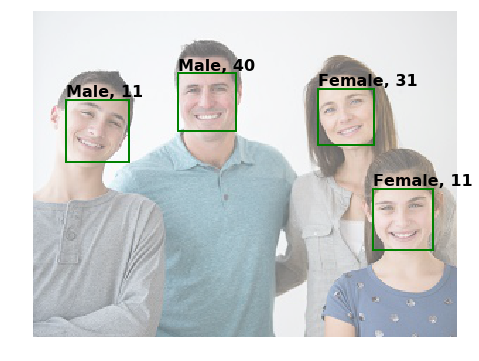

In [9]:
result = cv.analyzeUrl(group, 'Faces')
print(json.dumps(result, indent=2))

image_url = group
from matplotlib import patches
plt.figure(figsize=(10,6))

ax = displayImage(group, alpha=0.6)

# draw face rectangles on top of image
for face in result['faces']:
    fr = face["faceRectangle"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], \
                          fr["height"], fill=False, linewidth=2, color='g')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(face["gender"].capitalize(), face["age"]), \
             fontsize=16, weight="bold", va="bottom")

_ = plt.axis("off")

### Example: Image Type information

ClipartType

- Non-clipart = 0,
- ambiguous = 1,
- normal-clipart = 2,
- good-clipart = 3.


LineDrawingType

- Non-LineDrawing = 0,
- LineDrawing = 1.


{
  "imageType": {
    "clipArtType": 0,
    "lineDrawingType": 0
  },
  "requestId": "27a5d296-8d58-45f7-8e9e-2a79554f84ef",
  "metadata": {
    "height": 1280,
    "width": 1920,
    "format": "Jpeg"
  }
}


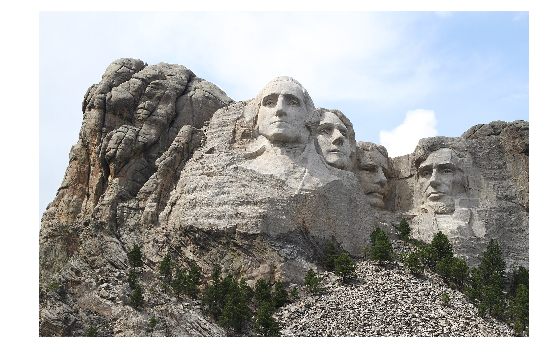

In [10]:
result = cv.analyzeUrl(rushmore, 'ImageType')
print(json.dumps(result, indent=2))
displayImage(rushmore);

{
  "imageType": {
    "clipArtType": 2,
    "lineDrawingType": 1
  },
  "requestId": "45d43e55-8b9b-47da-beaa-28ba63dab0d4",
  "metadata": {
    "height": 268,
    "width": 300,
    "format": "Jpeg"
  }
}


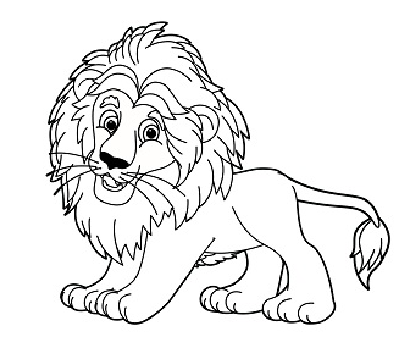

In [11]:
result = cv.analyzeUrl(lion, 'ImageType')
print(json.dumps(result, indent=2))
displayImage(lion);

### Example: Color information

{
  "color": {
    "dominantColorForeground": "White",
    "dominantColorBackground": "Grey",
    "dominantColors": [
      "Grey",
      "Green"
    ],
    "accentColor": "A37028",
    "isBwImg": false
  },
  "requestId": "0f6f89e1-6ec3-4d4e-982d-54aab2379d2f",
  "metadata": {
    "height": 267,
    "width": 300,
    "format": "Jpeg"
  }
}


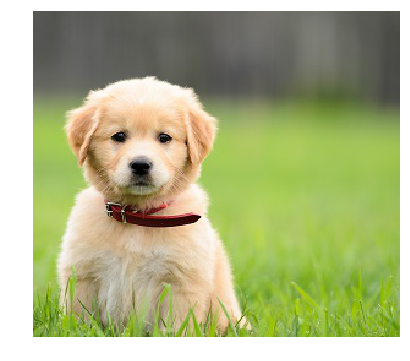

In [12]:
result = cv.analyzeUrl(dog, 'Color')
print(json.dumps(result, indent=2))
displayImage(dog);

{
  "color": {
    "dominantColorForeground": "Grey",
    "dominantColorBackground": "White",
    "dominantColors": [
      "Grey",
      "White"
    ],
    "accentColor": "282828",
    "isBwImg": true
  },
  "requestId": "30b647e2-1d8e-4688-ae74-4eef6598a54b",
  "metadata": {
    "height": 300,
    "width": 239,
    "format": "Jpeg"
  }
}


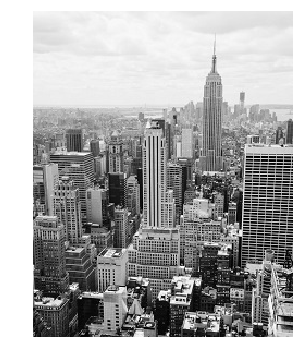

In [13]:
result = cv.analyzeUrl(city, 'Color')
print(json.dumps(result, indent=2))
displayImage(city);

### Example: Flagging Adult Content


In [14]:
result = cv.analyzeUrl(dog, 'Adult')
print(json.dumps(result, indent=2))

{
  "adult": {
    "isAdultContent": false,
    "adultScore": 0.0059519484639167786,
    "isRacyContent": false,
    "racyScore": 0.00913297850638628
  },
  "requestId": "3be6e3fb-fc4d-456f-a4aa-8146d7796091",
  "metadata": {
    "height": 267,
    "width": 300,
    "format": "Jpeg"
  }
}


Notice the extremely low adultScore which should help you make a more informed decision rather than just the True/False values

## Describe

Two methods:
- describeUrl
- describeImage

Usage: **cv.describeUrl(image_url, [maxCandidates])**
    
Notice that you can use the analyze method and specify Description in the VisualFeatures parameter to get the same information. However, this method allows to get back more than one description through the maxCandidates parameter

{
  "description": {
    "tags": [
      "outdoor",
      "building",
      "photo",
      "city",
      "white",
      "black",
      "large",
      "sitting",
      "top",
      "old",
      "water",
      "skyscraper",
      "many",
      "boat",
      "river",
      "group",
      "street",
      "people",
      "field",
      "tall",
      "bird",
      "standing"
    ],
    "captions": [
      {
        "text": "a black and white photo of a city",
        "confidence": 0.9530195248330481
      },
      {
        "text": "a black and white photo of a large city",
        "confidence": 0.9408519056321382
      },
      {
        "text": "a large white building in a city",
        "confidence": 0.9310836293195482
      }
    ]
  },
  "requestId": "780c2524-a48f-4440-ab41-58dbef886a0d",
  "metadata": {
    "height": 300,
    "width": 239,
    "format": "Jpeg"
  }
}


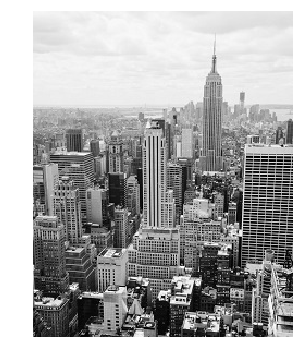

In [15]:
result = cv.describeUrl(city, maxCandidates=3)

print(json.dumps(result, indent=2))
_ = displayImage(city)

#alternate usage
#image_data = open('images/photo.jpg', "rb").read()
#result = cv.describeImage(city, maxCandidates=3)

## Domain-specific models

In addition to tagging and top-level categorization, Computer Vision API also supports specialized (or domain-specific) information. Specialized information can be implemented as a standalone method or with the high-level categorization. It functions as a means to further refine the 86-category taxonomy through the addition of domain-specific models.

Currently, the only specialized information supported are celebrity recognition and landmark recognition. They are domain-specific refinements for the people and people group categories, and landmarks around the world.

In [16]:
# get list of specialized models and the categories they expand on
models = cv.listDomainModels()
print(json.dumps(models, indent=2))
[model["name"] for model in models["models"]]

{
  "models": [
    {
      "name": "celebrities",
      "categories": [
        "people_",
        "\u4eba_"
      ]
    },
    {
      "name": "landmarks",
      "categories": [
        "outdoor_",
        "building_"
      ]
    }
  ]
}


['celebrities', 'landmarks']

{
  "result": {
    "landmarks": [
      {
        "name": "Mount Rushmore National Memorial",
        "confidence": 0.956598699092865
      }
    ]
  },
  "requestId": "4094f33c-9cdf-4144-8d1f-7525b18120c3",
  "metadata": {
    "height": 1280,
    "width": 1920,
    "format": "Jpeg"
  }
}


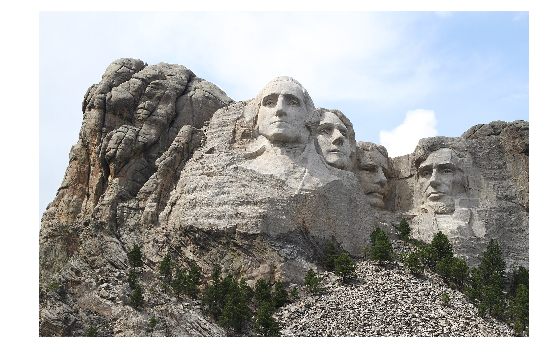

In [17]:
# we can specifically query a particular model
result = cv.analyzeUrlWithModel(rushmore,'landmarks')
print(json.dumps(result, indent=2))
_ = displayImage(rushmore)

In [18]:
# categorizing the image and asking for specialized analysis
result = cv.analyzeUrl(rushmore, 'Categories', details='Landmarks')
print(json.dumps(result, indent=2))

{
  "categories": [
    {
      "name": "outdoor_stonerock",
      "score": 0.59375,
      "detail": {
        "landmarks": [
          {
            "name": "Mount Rushmore National Memorial",
            "confidence": 0.956598699092865
          }
        ]
      }
    }
  ],
  "requestId": "1ebce066-8dd8-4824-b710-2d9f25ab9277",
  "metadata": {
    "height": 1280,
    "width": 1920,
    "format": "Jpeg"
  }
}


{
  "result": {
    "celebrities": [
      {
        "faceRectangle": {
          "top": 123,
          "left": 156,
          "width": 187,
          "height": 187
        },
        "name": "Bill Gates",
        "confidence": 0.9993845224380493
      }
    ]
  },
  "requestId": "ee6c517e-24b8-4705-9f42-61a2b272efbc",
  "metadata": {
    "height": 521,
    "width": 550,
    "format": "Jpeg"
  }
}


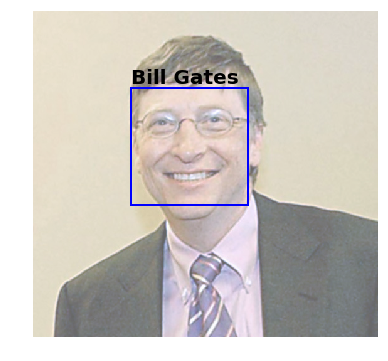

In [19]:
# checking for celebrities
result = cv.analyzeUrlWithModel(bgates, model='celebrities')
print(json.dumps(result, indent=2))

celebrity_info = result['result']['celebrities'][0]
celebrity_face = celebrity_info['faceRectangle']
celebrity_name = celebrity_info["name"]

# draw face rectangle
ax = displayImage(bgates, alpha=0.6)

origin = (celebrity_face["left"], celebrity_face["top"])
p = patches.Rectangle(origin, celebrity_face["width"], celebrity_face["height"], 
                   fill=False, linewidth=2, color='b')
ax.axes.add_patch(p)

# add text
_ = plt.text(origin[0], origin[1], celebrity_name, fontsize=20, weight="bold", va="bottom")


##  Thumbnails

Two methods:
- generateThumbnailForUrl
- generateThumbnailForImage

Usage: **cv.generateThumbnailForUrl(image_url, width, height, [smartCropping])**

Smartcropping is enabled by default but you can disable it by passing in False

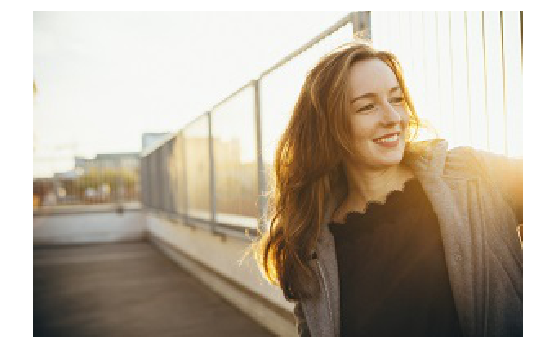

In [20]:
_ = displayImage(person)

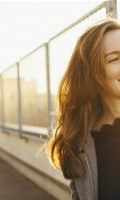

In [21]:
# with smartCropping OFF we may miss the important parts of the image
from IPython.core.display import Image as lImage
outputFile = cv.generateThumbnailForUrl(person, 120, 200, False)
lImage(outputFile)

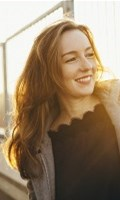

In [22]:
# with smartCropping ON
from IPython.core.display import Image as lImage
outputFile = cv.generateThumbnailForUrl(person, 120, 200, True)
lImage(outputFile)

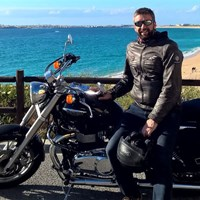

In [23]:
# using local file instead of Url
image_data = open('images/photo.jpg', "rb").read()
outputFile = cv.generateThumbnailForImage(image_data, 200, 200, True)
lImage(outputFile)

## Optical Character Recognition (OCR)

Two methods:
- ocrWithUrl
- ocrWithImage

Usage: 
- **ocrWithUrl(image_url, [language], [detectOrientation])**
- **ocrWithImage(imageData, [language], [detectOrientation])**

[
  {
    "boundingBox": "28,16,288,41",
    "text": "NOTHING"
  },
  {
    "boundingBox": "27,66,283,52",
    "text": "EXISTS"
  },
  {
    "boundingBox": "27,128,292,49",
    "text": "EXCEPT"
  },
  {
    "boundingBox": "24,188,292,54",
    "text": "ATOMS"
  },
  {
    "boundingBox": "22,253,105,32",
    "text": "AND"
  },
  {
    "boundingBox": "144,253,175,32",
    "text": "EMPTY"
  },
  {
    "boundingBox": "21,298,304,60",
    "text": "SPACE."
  },
  {
    "boundingBox": "26,387,210,37",
    "text": "Everything"
  },
  {
    "boundingBox": "249,389,71,27",
    "text": "else"
  },
  {
    "boundingBox": "127,431,31,29",
    "text": "is"
  },
  {
    "boundingBox": "172,431,153,36",
    "text": "opinion."
  }
]


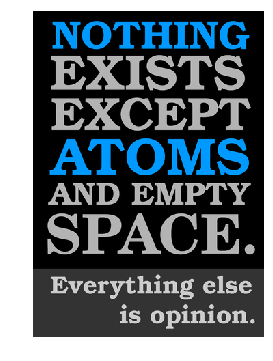

In [24]:
result = cv.ocrWithUrl(quote)

line_infos = [region["lines"] for region in result["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)

print(json.dumps(word_infos, indent=2))
_ = displayImage(quote)

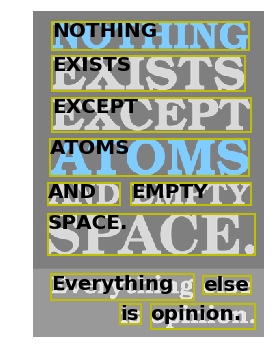

In [25]:
ax = displayImage(quote, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = patches.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

## Handwriting Recognition

Two methods:
- recognizeTextWithUrl
- recognizeTextWithImage

Usage:   
- **recognizeTextWithUrl(image_url)**  
- **recognizeTextWithImage(image_data)**

This API call doesn't return the recognized text directly. Instead it returns imediately with a url that we can then query to determine the status of the operation.

https://westeurope.api.cognitive.microsoft.com/vision/v1.0/textOperations/a8df5a70-4598-408b-afb1-de3e0cb9d609


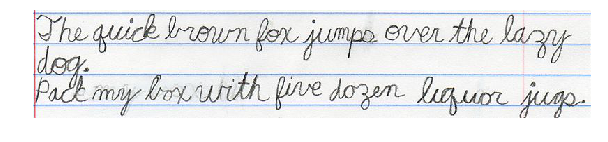

In [33]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg"
result = cv.recognizeTextWithUrl(image_url)

print(result)
displayImage(image_url)

Now, we can poll the url until the operation is complete. The SDK provides the **checkRecognizeTextStatus** operation to get the result of the task

In [34]:
import time

analysis = {}
while not "recognitionResult" in analysis:
    print("polling...")
    analysis = cv.checkRecognizeTextStatus(result)
    time.sleep(1)
    
print(analysis)

polling...
{'status': 'Succeeded', 'recognitionResult': {'lines': [{'boundingBox': [2, 52, 65, 46, 69, 89, 7, 95], 'text': 'dog', 'words': [{'boundingBox': [0, 59, 63, 43, 77, 86, 3, 102], 'text': 'dog'}]}, {'boundingBox': [6, 2, 771, 13, 770, 75, 5, 64], 'text': 'The quick brown fox jumps over the lazy', 'words': [{'boundingBox': [0, 4, 92, 5, 77, 71, 0, 71], 'text': 'The'}, {'boundingBox': [74, 4, 189, 5, 174, 72, 60, 71], 'text': 'quick'}, {'boundingBox': [176, 5, 321, 6, 306, 73, 161, 72], 'text': 'brown'}, {'boundingBox': [308, 6, 387, 6, 372, 73, 293, 73], 'text': 'fox'}, {'boundingBox': [382, 6, 506, 7, 491, 74, 368, 73], 'text': 'jumps'}, {'boundingBox': [492, 7, 607, 8, 592, 75, 478, 74], 'text': 'over'}, {'boundingBox': [589, 8, 673, 8, 658, 75, 575, 75], 'text': 'the'}, {'boundingBox': [660, 8, 783, 9, 768, 76, 645, 75], 'text': 'lazy'}]}, {'boundingBox': [2, 84, 783, 96, 782, 154, 1, 148], 'text': 'Pack my box with five dozen liquor jugs', 'words': [{'boundingBox': [0, 86, 

We can now extract what was recognized. Notice this api call returns polygons instead of rectangles.

In [35]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]
print(polygons)

[([2, 52, 65, 46, 69, 89, 7, 95], 'dog'), ([6, 2, 771, 13, 770, 75, 5, 64], 'The quick brown fox jumps over the lazy'), ([2, 84, 783, 96, 782, 154, 1, 148], 'Pack my box with five dozen liquor jugs')]


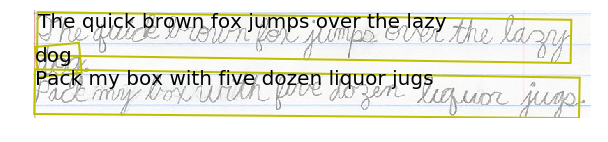

In [37]:
ax = displayImage(image_url, alpha=0.5)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = patches.Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")